<a href="https://colab.research.google.com/github/zakonreal/111/blob/main/homework_lesson3_%22SyntheticRubber_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/da-python/python-for-data-analytics/blob/main/Lesson3/hometask/SyntheticRubber.ipynb)

In [ ]:
!pip3 install yfinance
!pip3 install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import requests
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from bs4 import BeautifulSoup
import numpy as np
from tqdm.auto import tqdm
pd.options.display.max_rows = 10

In [ ]:
# Для работы с API может потребоваться обходное решение для работы с SSL сертификатом
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

# Задание 1.

* Вы - менеджер по продажам в нефтехимической компании.
* Вы ведете несколько ключевых клиентов, которые закупают продукты вашей компании.
* Ваши клиенты предпочитают формульный подход к ценообразованию и вам нужно предложить клиентам формулу цены на синтетический каучук, который может быть альтернативой натуральному каучуку с грейдом SMR 20.
* В зависимости от объемов, которые покупают клиенты, им может быть предложена скидка.


### Что нужно сделать?

1. Проанализировать имеющиеся данные.
2. Определить базовую формулу цены на условиях FCA (цена на заводе). То есть как бы выглядела цена на исторических данных.
3. Отобразить на графике.
4. Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
5. Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
- Создать директорию «для клиентов» и в ней сложить  файлы с расчетами.
- Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf)  с именем клиента…

### В результате должно быть 3 файла:
1. Ноутбук с расчетами и графиками.
2. Скрипт, который делает расчет цены для каждого клиента в одном файле
2. Скрипт, который делает расчет цены для каждого клиента в отельном файле

In [ ]:
# Из данных есть:
# Затраты на производство
PRODUCTION_COST = 400 # (EUR)

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

# * Справочная информация по клиентам(объемы, локации, комментарии)
customers = {
    'Monty':{
        'location':'EU',
        'volumes':200,
        'comment':'moving_average'
    },

    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'comment': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'comment': 'moving_average'
    },
    'Poly':{
        'location':'EU',
        'volumes': 70,
        'comment': 'monthly'
    }
}
# Скидки
discounts = {'up to 100': 0.01, # 1%
             'up to 300': 0.05, # 5%
             '300 plus': 0.1}   #10%


In [ ]:
# Котировки натурального каучука доступны на сайте,  https://www.lgm.gov.my
# также у них есть API, пример запроса ниже
#
# year = '2022'
# month = '05'
# url = f"https://www.lgm.gov.my/webv2api/api/rubberprice/month={month}&year={year}"
# res = requests.get(url)
# rj = res.json()
# df = pd.json_normalize(rj)
# df.head()

In [ ]:
# Котировки натурального каучука за период 2019-2022
year1 = '2022'
year2 = '2019'
month1 = '01'
month2 = '12'
df_rubber = pd.DataFrame()
for i in ['2019', '2020', '2021', '2022']:
  for j in ['01', '02', '03', '04','05', '06', '07', '08','09', '10', '11', '12']:
    url = f"https://www.lgm.gov.my/webv2api/api/rubberprice/month={j}&year={i}"
    res = requests.get(url)
    rj = res.json()
    df1 = pd.json_normalize(rj)
    df_rubber = df_rubber.append(df1, ignore_index=True)

In [ ]:
df_rubber

,date,grade,masa,rm,us,tone
0,2019-01-31,SMR CV,Noon,770.00,191.30,Quiet
1,2019-01-31,SMR L,Noon,750.00,186.35,Quiet
2,2019-01-31,SMR 5,Noon,549.50,136.50,Quiet
3,2019-01-31,SMR GP,Noon,546.50,135.80,Quiet
4,2019-01-31,SMR 10,Noon,539.50,134.05,Quiet
...,...,...,...,...,...,...
5966,2022-07-01,SMR 5,Noon,726.00,167.60,Steady
5967,2022-07-01,SMR GP,Noon,723.00,166.90,Steady
5968,2022-07-01,SMR 10,Noon,716.00,165.30,Steady
5969,2022-07-01,SMR 20,Noon,714.00,164.80,Steady


In [ ]:
DF = df_rubber.set_index('date')

In [ ]:
DFF = DF.rename(columns={'us': 'Close'})

In [ ]:
DFF.index = pd.to_datetime(DFF.index)

In [ ]:
DFF = DFF.astype({'Close': np.float})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
df_rubber_m = DFF.Close.resample('M').mean()

In [ ]:
# Тикеры
# курс евро к доллару 'EURUSD=X'
# курс евро к рублю 'EURRUB=X'
# курс доллара к рублю 'USDRUB=X'

In [ ]:
# котировки цен
exr_eurusd = yf.download( 'EURUSD=X')
exr_usdrub = yf.download('USDRUB=X')
exr_eurrub = yf.download('EURRUB=X')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df_dict = {}
for ticker in tqdm(['USDRUB=X', 'EURUSD=X', 'EURRUB=X']):
    df = yf.download(ticker)
    df = df.Close.copy()
    df = df.resample('M').mean()
    df_dict[ticker] = df

  0%|          | 0/3 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
main_df = pd.concat(df_dict.values(), axis=1)
main_df = pd.concat([df_rubber_m, main_df], axis=1)
main_df.columns = ['CRUDE_RUBBER_USD','USDRUB', 'EURUSD', 'EURRUB']
main_df = main_df.loc['2019-06-30':'2022-06-30'].copy()

In [ ]:
main_df

,CRUDE_RUBBER_USD,USDRUB,EURUSD,EURRUB
2019-06-30,224.053175,64.168690,1.129002,72.458005
2019-07-31,207.373701,63.176222,1.122682,70.956822
2019-08-31,190.399660,65.687992,1.113163,73.143709
2019-09-30,191.488492,64.971148,1.101377,71.589861
2019-10-31,186.057468,64.341009,1.104839,71.093322
...,...,...,...,...
2022-02-28,274.737302,77.466339,1.133995,87.878880
2022-03-31,278.389752,111.013403,1.102412,132.952291
2022-04-30,270.460150,80.666187,1.082745,86.109895
2022-05-31,264.685317,65.422944,1.057322,68.104363


In [ ]:
main_df['MWP_PRICE_EUR'] = main_df.CRUDE_RUBBER_USD * (1/main_df.EURUSD)
main_df['MWP_PRICE_USD'] = main_df.CRUDE_RUBBER_USD
main_df['MWP_PRICE_RUB'] = main_df.CRUDE_RUBBER_USD * main_df.USDRUB

In [ ]:
# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

In [ ]:
main_df['MWP_PRICE_EUR_EU'] = main_df['MWP_PRICE_EUR'] + EU_LOGISTIC_COST_EUR
main_df['MWP_PRICE_USD_CN'] = main_df['MWP_PRICE_USD'] + CN_LOGISTIC_COST_USD
main_df['MWP_PRICE_USD_RU'] = main_df['MWP_PRICE_RUB']

In [ ]:
main_df['MWP_PRICE_EUR_EU_MA'] = main_df.MWP_PRICE_EUR_EU.rolling(window=3).mean()

In [ ]:
main_df

,CRUDE_RUBBER_USD,USDRUB,EURUSD,EURRUB,MWP_PRICE_EUR,MWP_PRICE_USD,MWP_PRICE_RUB,MWP_PRICE_EUR_EU,MWP_PRICE_USD_CN,MWP_PRICE_USD_RU,MWP_PRICE_EUR_EU_MA
2019-06-30,224.053175,64.168690,1.129002,72.458005,198.452423,224.053175,14377.198601,228.452423,354.053175,14377.198601,NaN
2019-07-31,207.373701,63.176222,1.122682,70.956822,184.712827,207.373701,13101.086907,214.712827,337.373701,13101.086907,NaN
2019-08-31,190.399660,65.687992,1.113163,73.143709,171.043794,190.399660,12506.971253,201.043794,320.399660,12506.971253,214.736348
2019-09-30,191.488492,64.971148,1.101377,71.589861,173.862806,191.488492,12441.227087,203.862806,321.488492,12441.227087,206.539809
2019-10-31,186.057468,64.341009,1.104839,71.093322,168.402286,186.057468,11971.125235,198.402286,316.057468,11971.125235,201.102962
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,274.737302,77.466339,1.133995,87.878880,242.273716,274.737302,21282.892971,272.273716,404.737302,21282.892971,255.281824
2022-03-31,278.389752,111.013403,1.102412,132.952291,252.527753,278.389752,30904.993548,282.527753,408.389752,30904.993548,268.938530
2022-04-30,270.460150,80.666187,1.082745,86.109895,249.791294,270.460150,21816.989095,279.791294,400.460150,21816.989095,278.197588
2022-05-31,264.685317,65.422944,1.057322,68.104363,250.335487,264.685317,17316.492605,280.335487,394.685317,17316.492605,280.884845


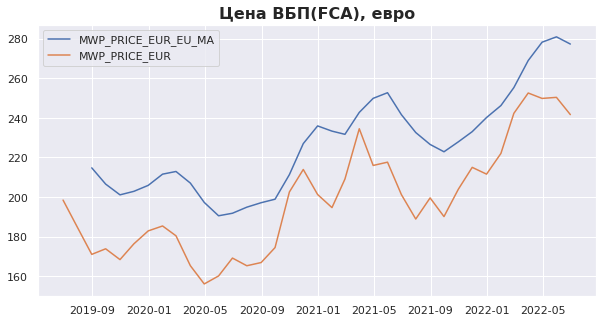

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,5
# График с базовой ценой(на заводе) в евро
plt.title('Цена ВБП(FCA), евро', fontsize=16, fontweight='bold')
plt.plot(main_df['MWP_PRICE_EUR_EU_MA'], label='MWP_PRICE_EUR_EU_MA')
plt.plot(main_df['MWP_PRICE_EUR'], label='MWP_PRICE_EUR')
plt.legend()
plt.show()

In [ ]:
customers

{'Monty': {'comment': 'moving_average', 'location': 'EU', 'volumes': 200},
 'Poly': {'comment': 'monthly', 'location': 'EU', 'volumes': 70},
 'Stone': {'comment': 'moving_average', 'location': 'EU', 'volumes': 150},
 'Triangle': {'comment': 'monthly', 'location': 'CN', 'volumes': 30}}

In [ ]:
discounts

{100: 0.01, 300: 0.05, 301: 0.1}

In [ ]:
discounts = {100: 0.01, 300: 0.05, 301: 0.1}

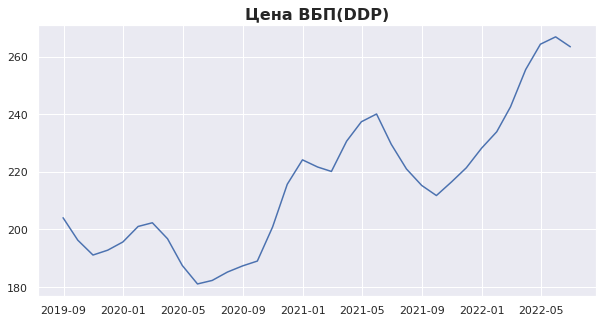

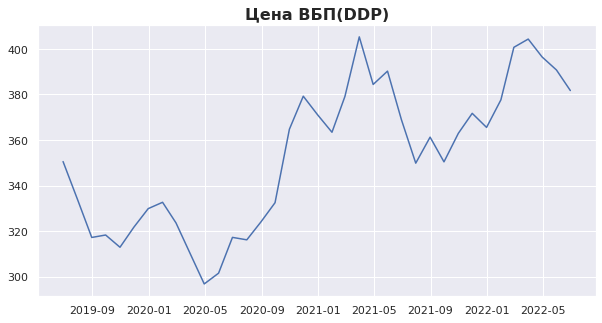

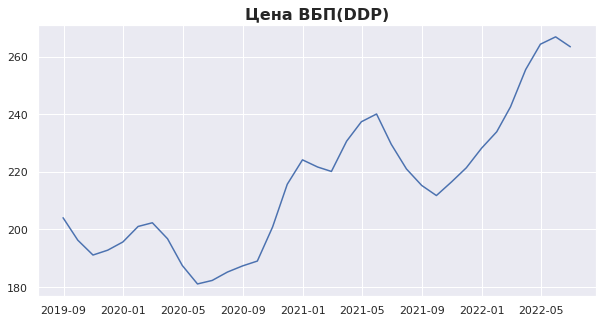

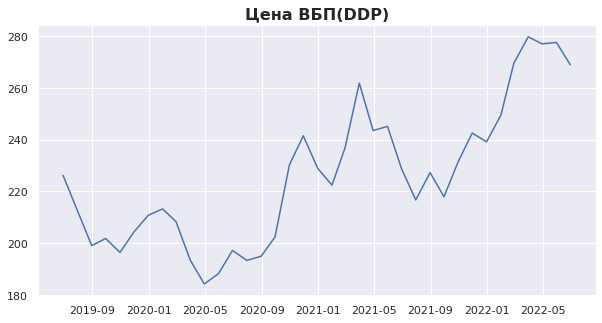

In [ ]:
with pd.ExcelWriter('price_proposals.xlsx', engine = 'xlsxwriter') as writer:
    for client, v in customers.items():

        disc = 0.0
        if v.get('location') == "EU":
            fl = 0
            for k_lim, discount_share in discounts.items():
                if v.get('volumes') > k_lim:
                    continue
                else:
                    disc = discount_share
                    fl = 1
                    break
            if fl == 0 :
                disc = discounts.get(max(discounts.keys()))

            if v.get('comment') == 'monthly':
                client_price = main_df['MWP_PRICE_EUR_EU'] * (1-disc)
            elif v.get('comment') == 'moving_average':
                client_price = main_df['MWP_PRICE_EUR_EU_MA'] * (1-disc)

        elif v.get('location') == 'CN':
            fl = 0
            for k_lim, discount_share in discounts.items():
                if v.get('volumes') > k_lim:
                    continue
                else:
                    disc = discount_share
                    fl = 1
                    break
            if fl == 0 :
                disc = discounts.get(max(discounts.keys()))

            client_price = main_df['MWP_PRICE_USD_CN'] * (1-disc)

        # print(client, v, disc)
        client_price.to_excel(writer, sheet_name=client)
        # Добавляем график с ценой
        plot_path = f'{client}_wbp.png'
        plt.title('Цена ВБП(DDP)', fontsize=16, fontweight='bold')
        plt.plot(client_price)
        plt.savefig(plot_path)
        plt.show()
        # worksheet = writer.sheets[client]
        # worksheet.insert_image('C2',plot_path)

    for k,v in customers.items():
        worksheet = writer.sheets[k]
        worksheet.insert_image('C2',f"{k}_wbp.png")

for k,v in customers.items():
    if os.path.exists(f"{k}_wbp.png"):
        os.remove(f"{k}_wbp.png")

In [ ]:
# Создаем директорию для ценовых предложений клиентам
price_proposals_path = 'client_wbp_price_proposals'
if not os.path.exists(price_proposals_path):
    os.mkdir(price_proposals_path)

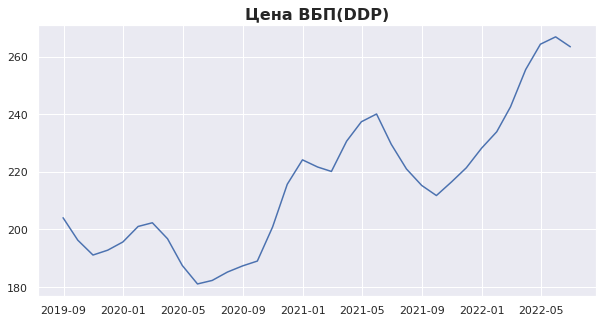

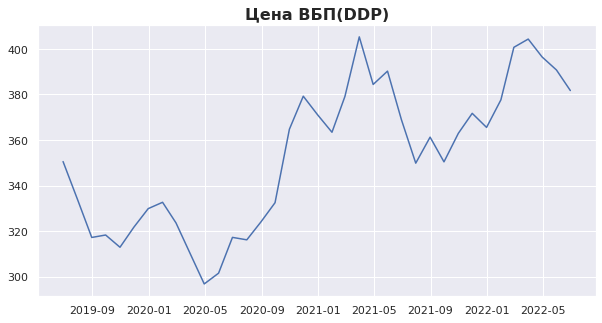

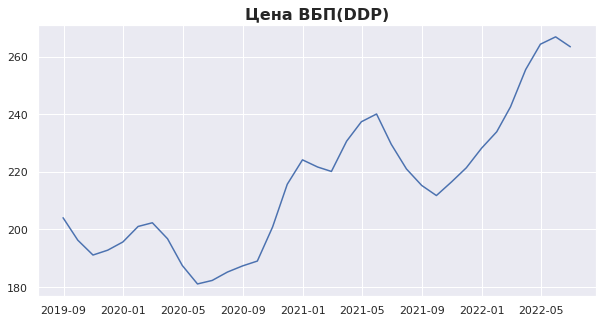

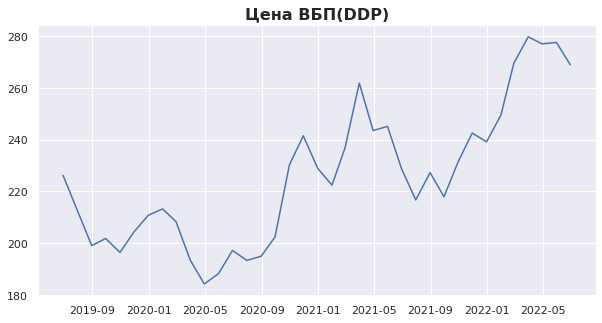

In [ ]:
# Создаем отдельный файл для каждого из клиентов
for client, v in customers.items():
    client_proposal_file_path = os.path.join(price_proposals_path, f'{client}_mwp_price_proposal.xlsx')
    location = v.get('location')
    disc = 0.0
    if v.get('location') == "EU":
        fl = 0
        for k_lim, discount_share in discounts.items():
            if v.get('volumes') > k_lim:
                continue
            else:
                disc = discount_share
                fl = 1
                break
        if fl == 0 :
            disc = discounts.get(max(discounts.keys()))

        if v.get('comment') == 'monthly':
            client_price = main_df['MWP_PRICE_EUR_EU'] * (1-disc)
        elif v.get('comment') == 'moving_average':
            client_price = main_df['MWP_PRICE_EUR_EU_MA'] * (1-disc)

    elif v.get('location') == 'CN':
        fl = 0
        for k_lim, discount_share in discounts.items():
            if v.get('volumes') > k_lim:
                continue
            else:
                disc = discount_share
                fl = 1
                break
        if fl == 0 :
            disc = discounts.get(max(discounts.keys()))

        client_price = main_df['MWP_PRICE_USD_CN'] * (1-disc)
    with pd.ExcelWriter(client_proposal_file_path, engine='xlsxwriter') as writer:
        client_price.to_excel(writer, sheet_name='price_proposal')
        # Добавляем график с ценой
        plot_path = f'{client}_wbp.png'
        plt.title('Цена ВБП(DDP)', fontsize=16, fontweight='bold')
        plt.plot(client_price)
        plt.savefig(plot_path)
        plt.show()
        worksheet = writer.sheets['price_proposal']
        worksheet.insert_image('C2',plot_path)

for k,v in customers.items():
    if os.path.exists(f"{k}_wbp.png"):
        os.remove(f"{k}_wbp.png")

# Задание 2. Продолжение

Клиенты согласились на ваше предложение. 
Вам нужно сделать написать скрипт, с помощью которого можно автоматом рассчитывать цены для всех клиентов одновременно. 
Важный момент: данные для расчета скрипт должен подтягивать сам.

В результате должно быть 3 файла
1. Ноутбук с расчетами и графиками (чтобы данные подтягивались туда)
2. Скрипт, который делает расчет цены для клиента (чтобы данные подтягивались туда сами)

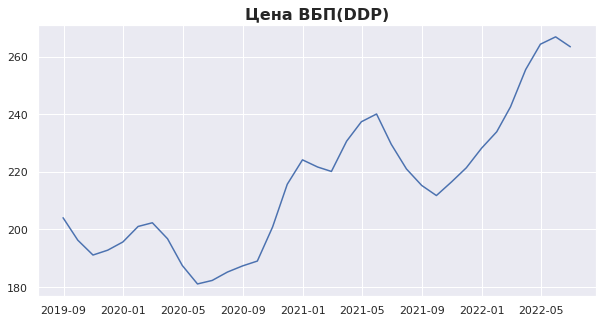

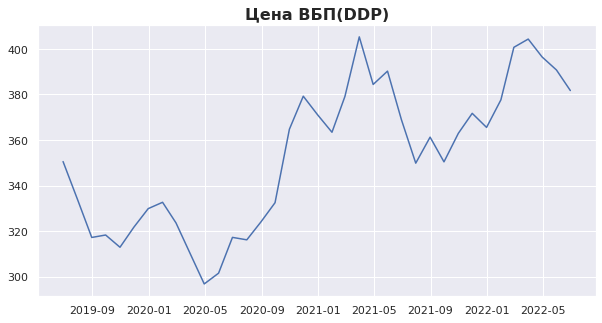

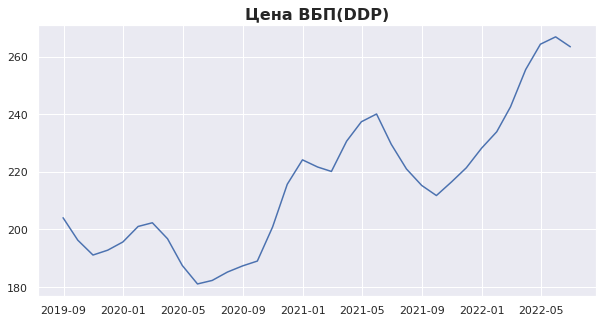

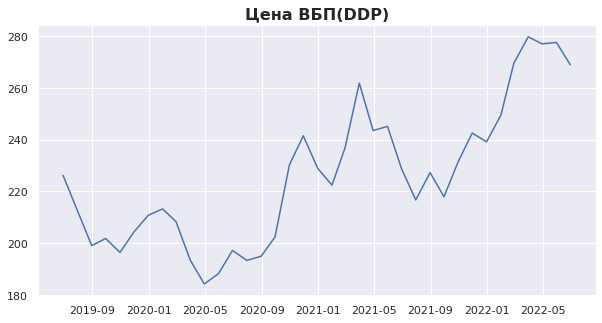

In [ ]:
# Создаем отдельный файл для каждого из клиентов
for client, v in customers.items():
    client_proposal_file_path = os.path.join(price_proposals_path, f'{client}_mwp_price_proposal.xlsx')
    location = v.get('location')
    disc = 0.0
    if v.get('location') == "EU":
        fl = 0
        for k_lim, discount_share in discounts.items():
            if v.get('volumes') > k_lim:
                continue
            else:
                disc = discount_share
                fl = 1
                break
        if fl == 0 :
            disc = discounts.get(max(discounts.keys()))

        if v.get('comment') == 'monthly':
            client_price = main_df['MWP_PRICE_EUR_EU'] * (1-disc)
        elif v.get('comment') == 'moving_average':
            client_price = main_df['MWP_PRICE_EUR_EU_MA'] * (1-disc)

    elif v.get('location') == 'CN':
        fl = 0
        for k_lim, discount_share in discounts.items():
            if v.get('volumes') > k_lim:
                continue
            else:
                disc = discount_share
                fl = 1
                break
        if fl == 0 :
            disc = discounts.get(max(discounts.keys()))

        client_price = main_df['MWP_PRICE_USD_CN'] * (1-disc)
    with pd.ExcelWriter(client_proposal_file_path, engine='xlsxwriter') as writer:
        client_price.to_excel(writer, sheet_name='price_proposal')
        # Добавляем график с ценой
        plot_path = f'{client}_wbp.png'
        plt.title('Цена ВБП(DDP)', fontsize=16, fontweight='bold')
        plt.plot(client_price)
        plt.savefig(plot_path)
        plt.show()
        worksheet = writer.sheets['price_proposal']
        worksheet.insert_image('C2',plot_path)

for k,v in customers.items():
    if os.path.exists(f"{k}_wbp.png"):
        os.remove(f"{k}_wbp.png")

# Задание 3. Back to Russia

К вам пришел новый клиент из России, он готов регулярно закупать синтетический каучук. Клиент готов забирать ВБП с завода самостоятельно.
1. На основе тех данных, которые уже есть предложите цену новому клиенту. 
2. Подготовьте скрипт, который будет использовать курс публикуемый на <a href='http://www.cbr.ru/currency_base/dynamics/'> сайте ЦБ РФ</a> или из любого другого источника.


In [ ]:
main_df

,CRUDE_RUBBER_USD,USDRUB,EURUSD,EURRUB,MWP_PRICE_EUR,MWP_PRICE_USD,MWP_PRICE_RUB,MWP_PRICE_EUR_EU,MWP_PRICE_USD_CN,MWP_PRICE_USD_RU,MWP_PRICE_EUR_EU_MA
2019-06-30,224.053175,64.168690,1.129002,72.458005,198.452423,224.053175,14377.198601,228.452423,354.053175,14377.198601,NaN
2019-07-31,207.373701,63.176222,1.122682,70.956822,184.712827,207.373701,13101.086907,214.712827,337.373701,13101.086907,NaN
2019-08-31,190.399660,65.687992,1.113163,73.143709,171.043794,190.399660,12506.971253,201.043794,320.399660,12506.971253,214.736348
2019-09-30,191.488492,64.971148,1.101377,71.589861,173.862806,191.488492,12441.227087,203.862806,321.488492,12441.227087,206.539809
2019-10-31,186.057468,64.341009,1.104839,71.093322,168.402286,186.057468,11971.125235,198.402286,316.057468,11971.125235,201.102962
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,274.737302,77.466339,1.133995,87.878880,242.273716,274.737302,21282.892971,272.273716,404.737302,21282.892971,255.281824
2022-03-31,278.389752,111.013403,1.102412,132.952291,252.527753,278.389752,30904.993548,282.527753,408.389752,30904.993548,268.938530
2022-04-30,270.460150,80.666187,1.082745,86.109895,249.791294,270.460150,21816.989095,279.791294,400.460150,21816.989095,278.197588
2022-05-31,264.685317,65.422944,1.057322,68.104363,250.335487,264.685317,17316.492605,280.335487,394.685317,17316.492605,280.884845


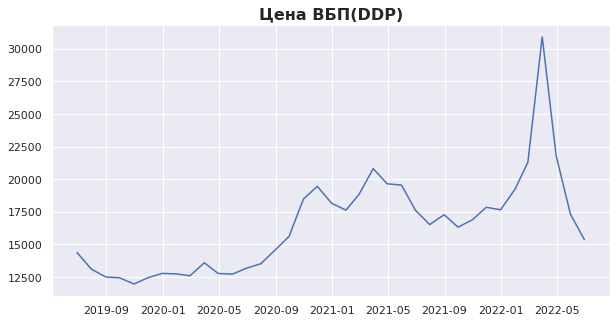

In [ ]:
with pd.ExcelWriter('price_proposal_RU.xlsx', engine = 'xlsxwriter') as writer:
        client_price = main_df['MWP_PRICE_USD_RU']
 
       # print(client, v, disc)
        client_price.to_excel(writer, sheet_name='price_proposal_RU')
        # Добавляем график с ценой
        plot_path = f'{client}_wbp.png'
        plt.title('Цена ВБП(DDP)', fontsize=16, fontweight='bold')
        plt.plot(client_price)
        plt.savefig(plot_path)
        plt.show()
        worksheet = writer.sheets['price_proposal_RU']
        worksheet.insert_image('C2',plot_path)

# Задание 4. Check it

* Подумайте, как можно проверить корректность работы алгоритма? 
* Какие возможны ошибки?
* Придумайте тесты для проверки возможных ошибок алгоритма
* Интергрируйте их в свои скрипты в виде исключений


In [1]:
# ?????

# Задание 5. Поделись с ближним

Вы решили пойти в отпуск на время вашего отсутствия вас будет заменять коллега. Он будет заниматься рассчетом цен для клиентов. Чтобы ему было проще вам нужно завернуть ваши скрипты в модуль, который будет запускать у себя коллега.

* Создайте модуль, который можно запускать в ноутбуке подкладывая в ту же директорию
* Хорошенько задокументируйте ВСЁ, но помните о PEP8

In [ ]:
# https://github.com/zakonreal/da_homework_student2/blob/main/conf.py
# https://github.com/zakonreal/da_homework_student2/blob/main/price_calculation.py
# https://github.com/zakonreal/da_homework_student2/blob/main/price_calculation_mod.py
# https://github.com/zakonreal/da_homework_student2/blob/main/Untitled8.ipynb

# Задание 6. Поделись пакетом

Ваши коллеги узнали, что вы быстро рассчитываете цены для формульных контрактов, и решили использовать такую же практику для своих продуктов и клиентов. Вам нужно создать пакет, чтобы его было проще устанавливать и использовать.

* Создайте отдельный пакет, который можно устанавливать с помощью pip 
* В пакете должны быть реализованы функции для рассчета цен по формульным контрактам
* Выложите пакет в репозиторий

In [ ]:
# !pip install yourpackage
# import yourpackage
# https://nuancesprog.ru/p/9911/
# ????? не получается
# https://github.com/zakonreal/da_homework_student2/blob/main/Untitled9.ipynb